In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [29]:
# Dataset Description
from data_handler.dataloader_factory import DataloaderFactory

_, _, _, _, _ = DataloaderFactory.get_dataloader("compas", sen_attr='sex', influence_scores=[])

mode : test
# of 0 group data :  [541 465]
# of 1 group data :  [142  86]


mode : train
# of 0 group data :  [1666 1533]
# of 1 group data :  [489 258]
mode : valid
# of 0 group data :  [391 398]
# of 1 group data :  [129  69]
# data of test  1234
# data of train  3946
# data of valid  987
Dataset loaded.


In [4]:
sen_attr_dict = {
    'adult': 'sex',
    'compas': 'sex',
    'bank': 'age',
    'retiring_adult': 'race',
    'retiring_adult_coverage': 'race'
}

In [23]:
dataset = 'adult'
sen_attr = sen_attr_dict[dataset]
option = 'fair_only' # 'fair_only', 'intersect'
constraint = 'eopp'
if dataset == "compas":
    k_arr = np.arange(1, 21, 1)
else:
    k_arr = np.concatenate((np.arange(0.1, 1.1, 0.1), np.arange(1, 3, 1)))
#k_arr = np.arange(0.1, 1.1, 0.1) # np.arange(0.1, 1.1, 0.1) or np.arange(1, 21, 1)
#k_arr = np.arange(1, 21, 1)
seed_arr = [0]

In [24]:
# naive

trng_acc_list = np.array([])
trng_fair_list = np.array([])

val_acc_list = np.array([])
val_fair_list = np.array([])

test_acc_list = np.array([])
test_fair_list = np.array([])

if constraint == "eopp":
    filename = "./log/fair_only/{}_seed_{}_sen_attr_{}_naive_log.txt"
elif constraint == "eo":
    filename = "./log/fair_only/{}_eo_seed_{}_sen_attr_{}_naive_log.txt"

for seed in seed_arr:
    with open(filename.format(dataset, seed, sen_attr), "rb") as fp:
        log = pickle.load(fp)
        max_idx = np.argmax(np.array(log[0]))
        
        trng_acc_list = np.append(trng_acc_list, log[0][max_idx])
        trng_fair_list = np.append(trng_fair_list, log[1][max_idx])
        val_acc_list = np.append(val_acc_list, log[2][max_idx])
        val_fair_list = np.append(val_fair_list, log[3][max_idx])
        test_acc_list = np.append(test_acc_list, log[4][max_idx])
        test_fair_list = np.append(test_fair_list, log[5][max_idx])
        
naive_trng_acc = np.mean(trng_acc_list)
naive_trng_fair = np.mean(trng_fair_list)
naive_val_acc = np.mean(val_acc_list)
naive_val_fair = np.mean(val_fair_list)
naive_test_acc = np.mean(test_acc_list)
naive_test_fair = np.mean(test_fair_list)
        
print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")
    

Average Trng Acc: 0.8656185174958977, Average Trng Fair: 0.07657580500306327
Average Val Acc: 0.8584853510226644, Average Val Fair: 0.08834191396232238
Average Test Acc: 0.8503040353786623, Average Test Fair: 0.0573456654481046


In [25]:
# Top k Last Epoch

trng_acc_list_by_k = np.array([])
trng_fair_list_by_k = np.array([])
val_acc_list_by_k = np.array([])
val_fair_list_by_k = np.array([])
test_acc_list_by_k = np.array([])
test_fair_list_by_k = np.array([])

if constraint == "eopp":
    filename = "./log/{}/{}_seed_{}_k_{:.1f}_sen_attr_{}_acc_fair_log.txt"
elif constraint == "eo":
    filename = "./log/{}/{}_eo_seed_{}_k_{:.1f}_sen_attr_{}_acc_fair_log.txt"

for k in k_arr:
    trng_acc_list = np.array([])
    trng_fair_list = np.array([])

    val_acc_list = np.array([])
    val_fair_list = np.array([])

    test_acc_list = np.array([])
    test_fair_list = np.array([])
    
    for seed in seed_arr:
            with open(filename.format(option, dataset, seed, k, sen_attr), "rb") as fp:
                log = pickle.load(fp)
                idx = 50 - 1

                trng_acc_list = np.append(trng_acc_list, log[0][idx])
                trng_fair_list = np.append(trng_fair_list, log[1][idx])
                val_acc_list = np.append(val_acc_list, log[2][idx])
                val_fair_list = np.append(val_fair_list, log[3][idx])
                test_acc_list = np.append(test_acc_list, log[4][idx])
                test_fair_list = np.append(test_fair_list, log[5][idx])
                
    trng_acc_list_by_k = np.append(trng_acc_list_by_k, np.mean(trng_acc_list))
    trng_fair_list_by_k = np.append(trng_fair_list_by_k, np.mean(trng_fair_list))
    val_acc_list_by_k = np.append(val_acc_list_by_k, np.mean(val_acc_list))
    val_fair_list_by_k = np.append(val_fair_list_by_k, np.mean(val_fair_list))
    test_acc_list_by_k = np.append(test_acc_list_by_k, np.mean(test_acc_list))
    test_fair_list_by_k = np.append(test_fair_list_by_k, np.mean(test_fair_list))  
          
# print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
# print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
# print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")



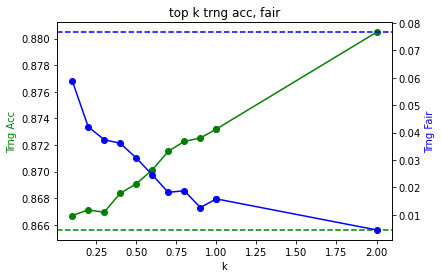

In [26]:
x = k_arr
y1 = trng_acc_list_by_k
y2 = trng_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'go-')
ax2.plot(x, y2, 'bo-')

ax1.axhline(y=naive_trng_acc, color='g', linestyle='--')
ax2.axhline(y=naive_trng_fair, color='b', linestyle='--')

ax1.set_xlabel('k')
ax1.set_ylabel('Trng Acc', color='g')
ax2.set_ylabel('Trng Fair', color='b')

plt.title("top k trng acc, fair")

plt.show()

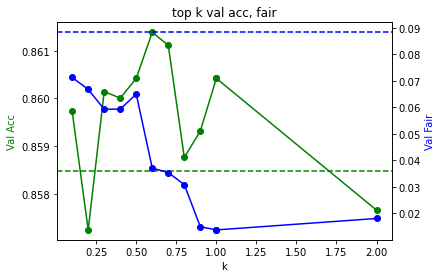

In [27]:
x = k_arr
y1 = val_acc_list_by_k
y2 = val_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'go-')
ax2.plot(x, y2, 'bo-')

ax1.axhline(y=naive_val_acc, color='g', linestyle='--')
ax2.axhline(y=naive_val_fair, color='b', linestyle='--')

ax1.set_xlabel('k')
ax1.set_ylabel('Val Acc', color='g')
ax2.set_ylabel('Val Fair', color='b')

plt.title("top k val acc, fair")

plt.show()

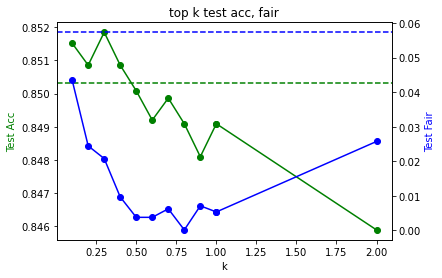

In [28]:
x = k_arr
y1 = test_acc_list_by_k
y2 = test_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'go-')
ax2.plot(x, y2, 'bo-')

ax1.axhline(y=naive_test_acc, color='g', linestyle='--')
ax2.axhline(y=naive_test_fair, color='b', linestyle='--')

ax1.set_xlabel('k')
ax1.set_ylabel('Test Acc', color='g')
ax2.set_ylabel('Test Fair', color='b')

plt.title("top k test acc, fair")

plt.show()

In [21]:
argmin = np.argmin(test_fair_list_by_k)
print(np.min(test_fair_list_by_k))
print("Test Acc: {}, Test Fair: {}".format(test_acc_list_by_k[argmin], test_fair_list_by_k[argmin]))

0.04928143333474022
Test Acc: 0.6160858869552612, Test Fair: 0.04928143333474022


In [22]:
# Top k Removed data info

for k in k_arr:
    data_cnt = np.zeros((2, 2))
    for seed in seed_arr:
        with open(f"./log/{option}/{dataset}_seed_{seed}_k_{k:.1f}_sen_attr_{sen_attr}_removed_data_info.txt", "rb") as fp:
            log = pickle.load(fp).ravel()
            data_cnt[0][0] += log[0]
            data_cnt[0][1] += log[1]
            data_cnt[1][0] += log[2]
            data_cnt[1][1] += log[3]
            
    print("k: {:.1f}\n".format(k), data_cnt / len(seed_arr))

k: 1.0
 [[26.5  1. ]
 [11.5  0. ]]
k: 2.0
 [[51.5   2.25]
 [23.75  0.5 ]]
k: 3.0
 [[75.5   3.  ]
 [38.75  0.75]]
k: 4.0
 [[95.  4.]
 [57.  1.]]
k: 5.0
 [[127.25   4.  ]
 [ 64.5    1.25]]
k: 6.0
 [[156.75   4.25]
 [ 73.75   1.25]]
k: 7.0
 [[187.     5.25]
 [ 82.25   1.5 ]]
k: 8.0
 [[211.25   7.  ]
 [ 95.25   1.5 ]]
k: 9.0
 [[237.25   9.  ]
 [107.25   1.5 ]]
k: 10.0
 [[258.    13.5 ]
 [120.75   1.75]]
k: 11.0
 [[278.5  17.5]
 [136.    2. ]]
k: 12.0
 [[302.   20.5]
 [148.5   2. ]]
k: 13.0
 [[326.25  23.25]
 [160.5    2.  ]]
k: 14.0
 [[350.25  27.75]
 [172.     2.  ]]
k: 15.0
 [[372.75  31.25]
 [185.     2.  ]]
k: 16.0
 [[396.5   34.75]
 [197.75   2.  ]]
k: 17.0
 [[417.25  38.  ]
 [212.75   2.  ]]
k: 18.0
 [[444.25  41.5 ]
 [222.25   2.  ]]
k: 19.0
 [[468.75  45.25]
 [233.     2.  ]]
k: 20.0
 [[496.5   49.75]
 [240.75   2.  ]]


In [23]:
# Top k group wise accuracy

# (epoch, trng/val/test, group, 2by2 confusion)

val_tpr_g0_by_k = np.array([])
val_tpr_g1_by_k = np.array([])
test_tpr_g0_by_k = np.array([])
test_tpr_g1_by_k = np.array([])

val_tnr_g0_by_k = np.array([])
val_tnr_g1_by_k = np.array([])

test_tnr_g0_by_k = np.array([])
test_tnr_g1_by_k = np.array([])

if constraint == "eopp":
    filename = "./log/{}/{}_seed_{}_k_{:.1f}_sen_attr_{}_confusion_matrix.txt"
elif constraint == "eo":
    filename = "./log/{}/{}_eo_seed_{}_k_{:.1f}_sen_attr_{}_confusion_matrix.txt"

for k in k_arr:
    val_g0 = np.zeros((2,2))
    val_g1 = np.zeros((2,2))
    test_g0 = np.zeros((2,2))
    test_g1 = np.zeros((2,2))
    for seed in seed_arr:
        with open(filename.format(option, dataset, seed, k, sen_attr), "rb") as fp:
            log = pickle.load(fp)[50 - 1]
            
            for g in range(2):
                if g == 0:
                    val_g0 += log[1][g]
                    test_g0 += log[2][g]
                elif g == 1:
                    val_g1 += log[1][g]
                    test_g1 += log[2][g]
                    
                    
    val_g0 /= len(seed_arr)
    val_g1 /= len(seed_arr)
    test_g0 /= len(seed_arr)
    test_g1 /= len(seed_arr)
    
    
    
    print(f"g0, {k}:", test_g0)
#     print(f"g1, {k}:", test_g1)
    val_tpr_g0_by_k = np.append(val_tpr_g0_by_k, val_g0[1][1]/(val_g0[1][0]+val_g0[1][1]))
    val_tpr_g1_by_k = np.append(val_tpr_g1_by_k, val_g1[1][1]/(val_g1[1][0]+val_g1[1][1]))
    test_tpr_g0_by_k = np.append(test_tpr_g0_by_k, test_g0[1][1]/(test_g0[1][0]+test_g0[1][1]))
    test_tpr_g1_by_k = np.append(test_tpr_g1_by_k, test_g1[1][1]/(test_g1[1][0]+test_g1[1][1]))
    
    val_tnr_g0_by_k = np.append(val_tnr_g0_by_k, val_g0[0][0]/(val_g0[0][0]+val_g0[0][1]))
    val_tnr_g1_by_k = np.append(val_tnr_g1_by_k, val_g1[0][0]/(val_g1[0][0]+val_g1[0][1]))
    test_tnr_g0_by_k = np.append(test_tnr_g0_by_k, test_g0[0][0]/(test_g0[0][0]+test_g0[0][1]))
    test_tnr_g1_by_k = np.append(test_tnr_g1_by_k, test_g1[0][0]/(test_g1[0][0]+test_g1[0][1]))
    

g0, 1: [[374.   167.  ]
 [166.75 298.25]]
g0, 2: [[368.75 172.25]
 [162.75 302.25]]
g0, 3: [[367.25 173.75]
 [160.75 304.25]]
g0, 4: [[363.25 177.75]
 [158.75 306.25]]
g0, 5: [[359.25 181.75]
 [157.25 307.75]]
g0, 6: [[351.75 189.25]
 [155.25 309.75]]
g0, 7: [[346.75 194.25]
 [152.75 312.25]]
g0, 8: [[345.   196.  ]
 [156.25 308.75]]
g0, 9: [[344.25 196.75]
 [158.25 306.75]]
g0, 10: [[340.25 200.75]
 [156.5  308.5 ]]
g0, 11: [[338.75 202.25]
 [159.5  305.5 ]]
g0, 12: [[337.75 203.25]
 [159.   306.  ]]
g0, 13: [[331.75 209.25]
 [154.75 310.25]]
g0, 14: [[326.   215.  ]
 [151.25 313.75]]
g0, 15: [[322.75 218.25]
 [146.75 318.25]]
g0, 16: [[314.25 226.75]
 [142.75 322.25]]
g0, 17: [[308.75 232.25]
 [138.25 326.75]]
g0, 18: [[300.5  240.5 ]
 [132.75 332.25]]
g0, 19: [[293.75 247.25]
 [131.   334.  ]]
g0, 20: [[286.25 254.75]
 [124.25 340.75]]


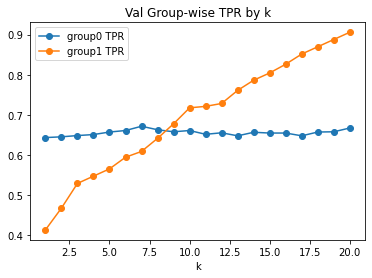

In [25]:
plt.plot(k_arr, val_tpr_g0_by_k, 'o-', label="group0 TPR")
plt.plot(k_arr, val_tpr_g1_by_k, 'o-', label="group1 TPR")

plt.legend()
plt.title("Val Group-wise TPR by k")
plt.xlabel("k")
plt.show()

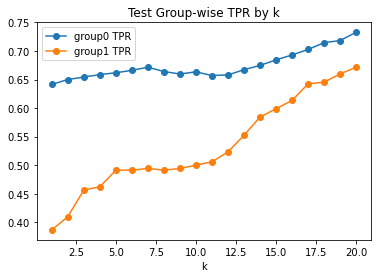

In [26]:
plt.plot(k_arr, test_tpr_g0_by_k, 'o-', label="group0 TPR")
plt.plot(k_arr, test_tpr_g1_by_k, 'o-', label="group1 TPR")

plt.legend()
plt.title("Test Group-wise TPR by k")
plt.xlabel("k")
plt.show()

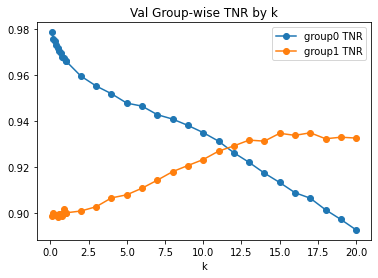

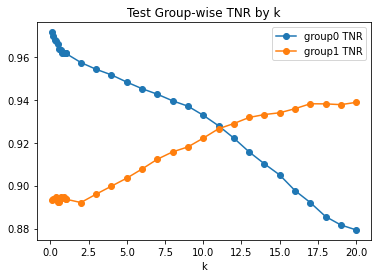

In [17]:
plt.plot(k_arr, val_tnr_g0_by_k, 'o-', label="group0 TNR")
plt.plot(k_arr, val_tnr_g1_by_k, 'o-', label="group1 TNR")

plt.legend()
plt.title("Val Group-wise TNR by k")
plt.xlabel("k")
plt.show()

plt.plot(k_arr, test_tnr_g0_by_k, 'o-', label="group0 TNR")
plt.plot(k_arr, test_tnr_g1_by_k, 'o-', label="group1 TNR")

plt.legend()
plt.title("Test Group-wise TNR by k")
plt.xlabel("k")
plt.show()

In [18]:
# Bottom k Last Epoch

trng_acc_list_by_k = np.array([])
trng_fair_list_by_k = np.array([])
val_acc_list_by_k = np.array([])
val_fair_list_by_k = np.array([])
test_acc_list_by_k = np.array([])
test_fair_list_by_k = np.array([])


if constraint == "eopp":
    filename = "./log/{}/{}_seed_{}_bottom_k_{:.1f}_sen_attr_{}_acc_fair_log.txt"
elif constraint == "eo":
    filename = "./log/{}/{}_eo_seed_{}_bottom_k_{:.1f}_sen_attr_{}_acc_fair_log.txt"


for k in k_arr:
    trng_acc_list = np.array([])
    trng_fair_list = np.array([])

    val_acc_list = np.array([])
    val_fair_list = np.array([])

    test_acc_list = np.array([])
    test_fair_list = np.array([])
    
    for seed in seed_arr:
            with open(filename.format(option, dataset, seed, k, sen_attr), "rb") as fp:
                log = pickle.load(fp)
                idx = 50 - 1

                trng_acc_list = np.append(trng_acc_list, log[0][idx])
                trng_fair_list = np.append(trng_fair_list, log[1][idx])
                val_acc_list = np.append(val_acc_list, log[2][idx])
                val_fair_list = np.append(val_fair_list, log[3][idx])
                test_acc_list = np.append(test_acc_list, log[4][idx])
                test_fair_list = np.append(test_fair_list, log[5][idx])
                
    trng_acc_list_by_k = np.append(trng_acc_list_by_k, np.mean(trng_acc_list))
    trng_fair_list_by_k = np.append(trng_fair_list_by_k, np.mean(trng_fair_list))
    val_acc_list_by_k = np.append(val_acc_list_by_k, np.mean(val_acc_list))
    val_fair_list_by_k = np.append(val_fair_list_by_k, np.mean(val_fair_list))
    test_acc_list_by_k = np.append(test_acc_list_by_k, np.mean(test_acc_list))
    test_fair_list_by_k = np.append(test_fair_list_by_k, np.mean(test_fair_list))  
          
# print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
# print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
# print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")



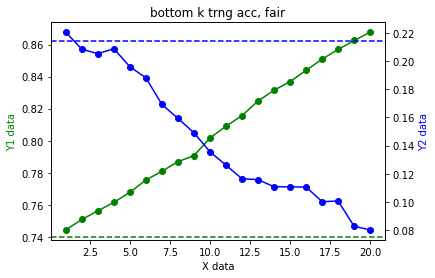

In [44]:
x = k_arr
y1 = trng_acc_list_by_k
y2 = trng_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'go-')
ax2.plot(x, y2, 'bo-')

ax1.axhline(y=naive_trng_acc, color='g', linestyle='--')
ax2.axhline(y=naive_trng_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("bottom k trng acc, fair")

plt.show()

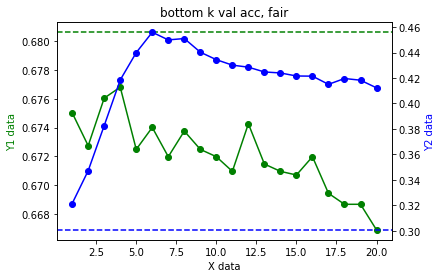

In [45]:
x = k_arr
y1 = val_acc_list_by_k
y2 = val_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'go-')
ax2.plot(x, y2, 'bo-')

ax1.axhline(y=naive_val_acc, color='g', linestyle='--')
ax2.axhline(y=naive_val_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("bottom k val acc, fair")

plt.show()

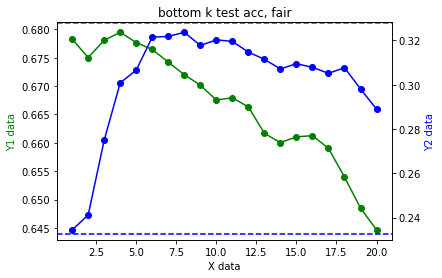

In [46]:
x = k_arr
y1 = test_acc_list_by_k
y2 = test_fair_list_by_k

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'go-')
ax2.plot(x, y2, 'bo-')

ax1.axhline(y=naive_test_acc, color='g', linestyle='--')
ax2.axhline(y=naive_test_fair, color='b', linestyle='--')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.title("bottom k test acc, fair")

plt.show()

In [47]:
# Bottom k group wise accuracy

# (epoch, trng/val/test, group, 2by2 confusion)

val_tpr_g0_by_k = np.array([])
val_tpr_g1_by_k = np.array([])
test_tpr_g0_by_k = np.array([])
test_tpr_g1_by_k = np.array([])

if constraint == "eopp":
    filename = "./log/{}/{}_seed_{}_bottom_k_{:.1f}_sen_attr_{}_confusion_matrix.txt"
elif constraint == "eo":
    filename = "./log/{}/{}_eo_seed_{}_bottom_k_{:.1f}_sen_attr_{}_confusion_matrix.txt"


for k in k_arr:
    val_g0 = np.zeros((2,2))
    val_g1 = np.zeros((2,2))
    test_g0 = np.zeros((2,2))
    test_g1 = np.zeros((2,2))
    for seed in seed_arr:
        with open(filename.format(option, dataset, seed, k, sen_attr), "rb") as fp:
            log = pickle.load(fp)[50 - 1]
            
            for g in range(2):
                if g == 0:
                    val_g0 += log[1][g]
                    test_g0 += log[2][g]
                elif g == 1:
                    val_g1 += log[1][g]
                    test_g1 += log[2][g]
                    
                    
    val_g0 /= len(seed_arr)
    val_g1 /= len(seed_arr)
    test_g0 /= len(seed_arr)
    test_g1 /= len(seed_arr)
    
    val_tpr_g0_by_k = np.append(val_tpr_g0_by_k, val_g0[1][1]/(val_g0[0][1]+val_g0[1][1]))
    val_tpr_g1_by_k = np.append(val_tpr_g1_by_k, val_g1[1][1]/(val_g1[0][1]+val_g1[1][1]))
    test_tpr_g0_by_k = np.append(test_tpr_g0_by_k, test_g0[1][1]/(test_g0[0][1]+test_g0[1][1]))
    test_tpr_g1_by_k = np.append(test_tpr_g1_by_k, test_g1[1][1]/(test_g1[0][1]+test_g1[1][1]))
    

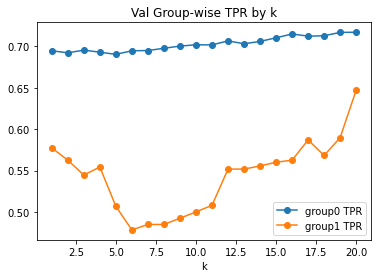

In [48]:
plt.plot(k_arr, val_tpr_g0_by_k, 'o-', label="group0 TPR")
plt.plot(k_arr, val_tpr_g1_by_k, 'o-', label="group1 TPR")

plt.legend()
plt.title("Val Group-wise TPR by k")
plt.xlabel("k")
plt.show()

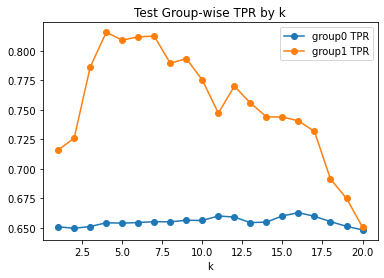

In [49]:
plt.plot(k_arr, test_tpr_g0_by_k, 'o-', label="group0 TPR")
plt.plot(k_arr, test_tpr_g1_by_k, 'o-', label="group1 TPR")

plt.legend()
plt.title("Test Group-wise TPR by k")
plt.xlabel("k")
plt.show()

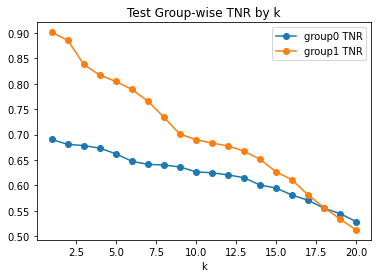

In [50]:
plt.plot(k_arr, test_tnr_g0_by_k, 'o-', label="group0 TNR")
plt.plot(k_arr, test_tnr_g1_by_k, 'o-', label="group1 TNR")

plt.legend()
plt.title("Test Group-wise TNR by k")
plt.xlabel("k")
plt.show()